In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
IMAGE_SIZE = 256
CHANNELS = 3

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
)

Found 1506 images belonging to 3 classes.


In [39]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [40]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [10]:
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break

[[[0.6083716  0.52994025 0.56523436]
  [0.59839994 0.51996857 0.5552627 ]
  [0.5884283  0.50999695 0.54529107]
  ...
  [0.7193932  0.65272653 0.6919422 ]
  [0.69385356 0.6271869  0.6664026 ]
  [0.5375191  0.4708525  0.5100681 ]]

 [[0.70305806 0.6246267  0.6599208 ]
  [0.7068933  0.62846196 0.6637561 ]
  [0.7107285  0.63229716 0.6675913 ]
  ...
  [0.7351177  0.668451   0.7076667 ]
  [0.6819643  0.6152976  0.6545133 ]
  [0.53253335 0.46586666 0.50508237]]

 [[0.6126479  0.5342165  0.56951064]
  [0.61801726 0.5395859  0.57488   ]
  [0.6233866  0.54495525 0.58024937]
  ...
  [0.7508422  0.68417555 0.72339123]
  [0.670075   0.60340834 0.642624  ]
  [0.5275475  0.46088082 0.5000965 ]]

 ...

 [[0.6908044  0.5966868  0.58884364]
  [0.75811255 0.6639949  0.6561518 ]
  [0.6364197  0.5423021  0.53445894]
  ...
  [0.6057706  0.5155745  0.5391039 ]
  [0.61209875 0.5219027  0.5454321 ]
  [0.618427   0.5282309  0.5517603 ]]

 [[0.6988585  0.60474086 0.5968977 ]
  [0.749675   0.65555733 0.6477142 ]


In [15]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [16]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 431 images belonging to 3 classes.


In [18]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [19]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [21]:
1506/32

47.0625

In [24]:
history=model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1, 
    epochs=20
)

Epoch 1/20


C:\Users\tharu\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.4570 - loss: 0.9589 - val_accuracy: 0.6667 - val_loss: 0.8960
Epoch 2/20
 1/47 ━━━━━━━━━━━━━━━━━━━━ 23s 502ms/step - accuracy: 0.5938 - loss: 1.0202

C:\Users\tharu\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5938 - loss: 1.0202 - val_accuracy: 0.6087 - val_loss: 0.8340
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 783ms/step - accuracy: 0.4752 - loss: 0.8929 - val_accuracy: 0.7448 - val_loss: 0.5802
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6562 - loss: 0.6397 - val_accuracy: 0.6957 - val_loss: 0.6599
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 41s 814ms/step - accuracy: 0.7723 - loss: 0.5070 - val_accuracy: 0.9115 - val_loss: 0.2669
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9688 - loss: 0.1442 - val_accuracy: 0.7826 - val_loss: 0.4872
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 776ms/step - accuracy: 0.8627 - loss: 0.3400 - val_accuracy: 0.9115 - val_loss: 0.2192
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8750 - loss: 0.3294 - val_accuracy: 0.9130 - val_loss: 0.2085
Epoch 9/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 793ms/step - accuracy: 0.9216 - loss: 0.1931 - val_accuracy: 0.9427 - val_los

In [25]:
scores = model.evaluate(test_generator)

14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 721ms/step - accuracy: 0.9820 - loss: 0.0804


In [26]:
scores

[0.09799623489379883, 0.9721577763557434]

In [27]:
history

In [28]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [29]:
history.history.keys

<function dict.keys>

In [31]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.9150529503822327,
 1.0201611518859863,
 0.8444900512695312,
 0.6397286653518677,
 0.47001853585243225]

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [33]:
val_acc

[0.6666666865348816,
 0.6086956262588501,
 0.7447916865348816,
 0.695652186870575,
 0.9114583134651184,
 0.782608687877655,
 0.9114583134651184,
 0.9130434989929199,
 0.9427083134651184,
 0.95652174949646,
 0.9583333134651184,
 0.95652174949646,
 0.9583333134651184,
 0.95652174949646,
 0.9791666865348816,
 0.95652174949646,
 0.9479166865348816,
 0.95652174949646,
 0.9635416865348816,
 0.95652174949646]

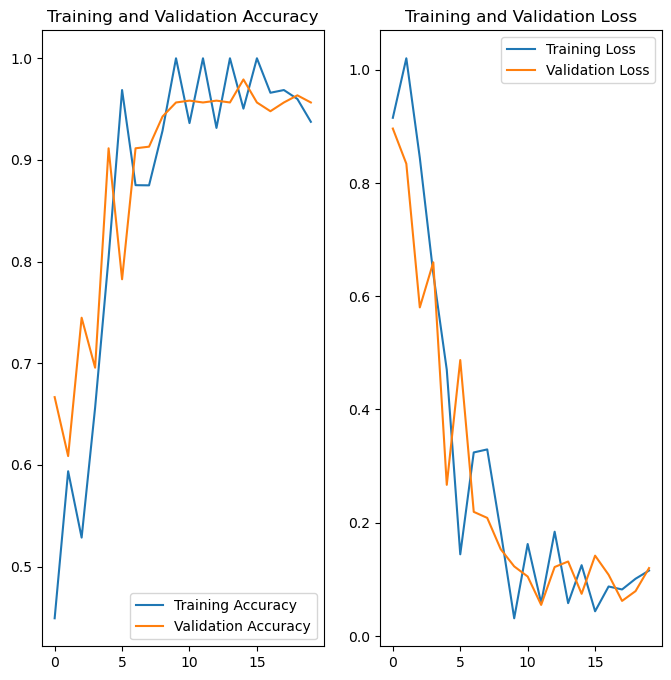

In [34]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [49]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(labels_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

NameError: name 'labels_batch' is not defined

In [51]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


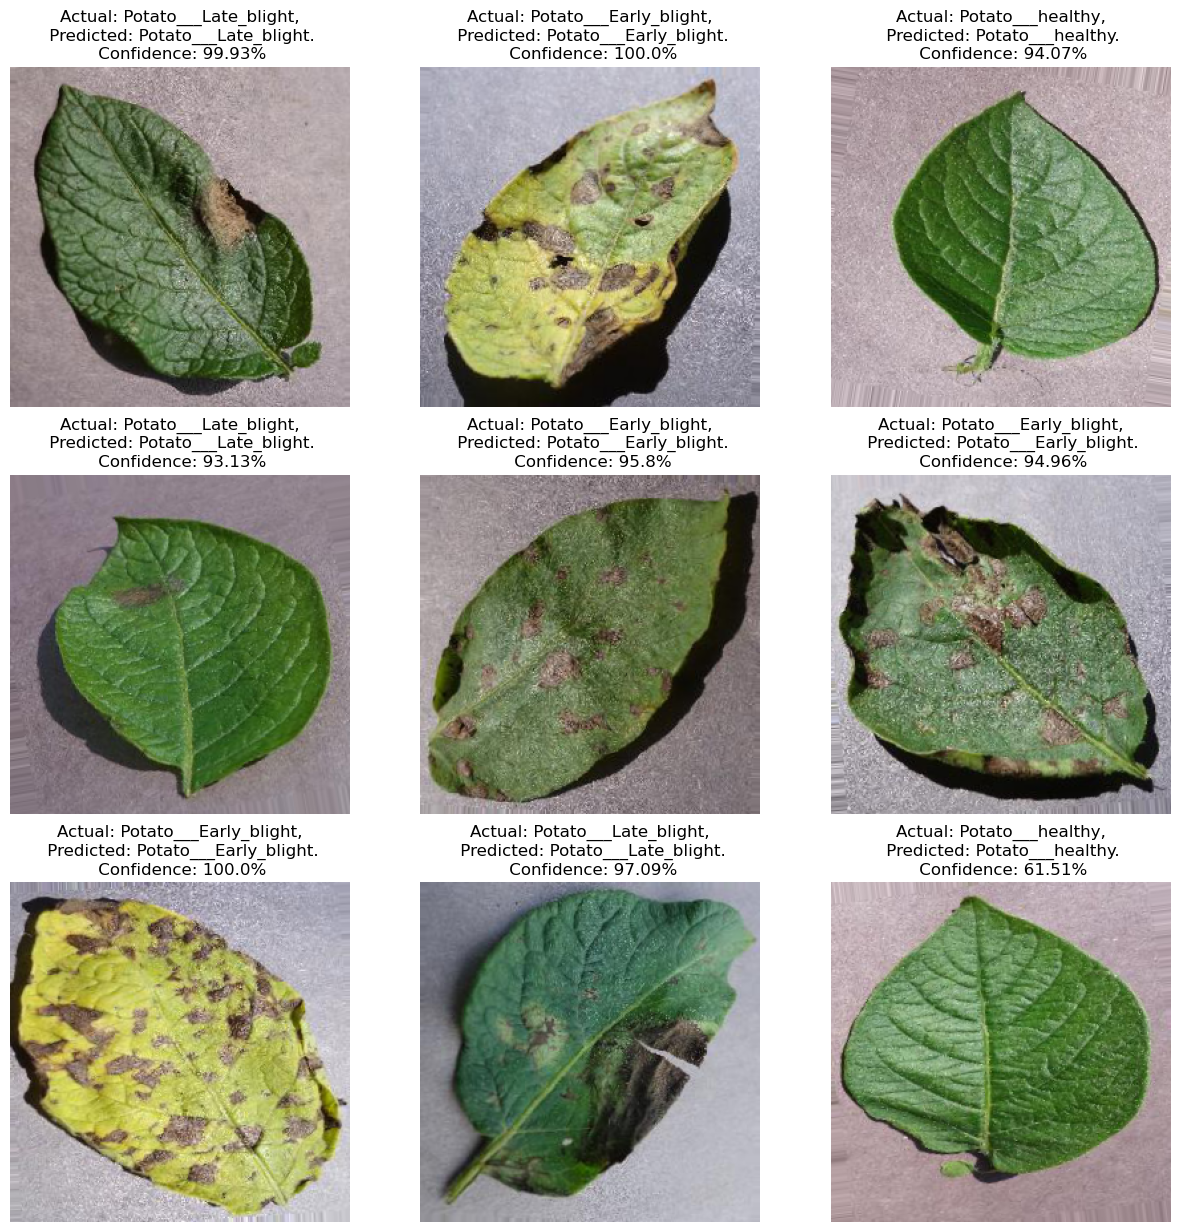

In [52]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [54]:
model.save("../potatoes.h5")